In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [4]:
#definir la ruta del data set
ruta="D:/python/Ventas.csv"
df = pd.read_csv(ruta)
df.head()

,Fecha,DiaDeLaSemana,Promociones,Festivo,Ventas
0,01/01/2022,6,0,0,4033
1,02/01/2022,7,0,1,4012
2,03/01/2022,1,0,0,1608
3,04/01/2022,2,1,0,2046
4,05/01/2022,3,0,0,2484


In [5]:
#compropar si hay datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DiaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [6]:
#convertir fecha de tipo strin a una tipo datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])
df

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_58692\672495397.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Fecha"] = pd.to_datetime(df["Fecha"])


,Fecha,DiaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-02-01,7,0,1,4012
2,2022-03-01,1,0,0,1608
3,2022-04-01,2,1,0,2046
4,2022-05-01,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [7]:
# se prepara el escalador para que esten entre rangos de 0 a 1
escala=MinMaxScaler(feature_range=(0,1))

#Eliminar las columnas de centas y fecha ya que no seran utilizadas
columnas_para_escalar = df.drop(["Ventas", "Fecha"], axis=1).columns

# Se usa MinMaxScaler a las columnas restantes y se transforman los datos
normalizado = escala.fit_transform(df[columnas_para_escalar])

#se crean nuevos dataframe con los datos normalizados y las columnas necesarias
df_normalizado = pd.DataFrame(data=normalizado, columns=columnas_para_escalar)

#Como puede ser necesario el uso de las columnas no escaladas estas se vuelven a adjuntar nuevamente
df_normalizado["Ventas"] = df["Ventas"]
df_normalizado["Fecha"] = df["Fecha"]

df_normalizado.head()




,DiaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-02-01
2,0.000000,0.0,0.0,1608,2022-03-01
3,0.166667,1.0,0.0,2046,2022-04-01
4,0.333333,0.0,0.0,2484,2022-05-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DiaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [9]:
# Dividir entre variables dependientes e independientes
X=df_normalizado.drop(["Ventas","Fecha"], axis=1)
y=df["Ventas"]

In [10]:
# Dividir en conjuntos de entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

In [11]:
df.describe()

,DiaDeLaSemana,Promociones,Festivo,Ventas
count,365.000000,365.000000,365.000000,365.000000
mean,4.005479,0.200000,0.142466,2997.219178
std,2.002738,0.400549,0.350007,942.096284
min,1.000000,0.000000,0.000000,1305.000000
25%,2.000000,0.000000,0.000000,2195.000000
50%,4.000000,0.000000,0.000000,3074.000000
75%,6.000000,0.000000,0.000000,3979.000000
max,7.000000,1.000000,1.000000,4404.000000


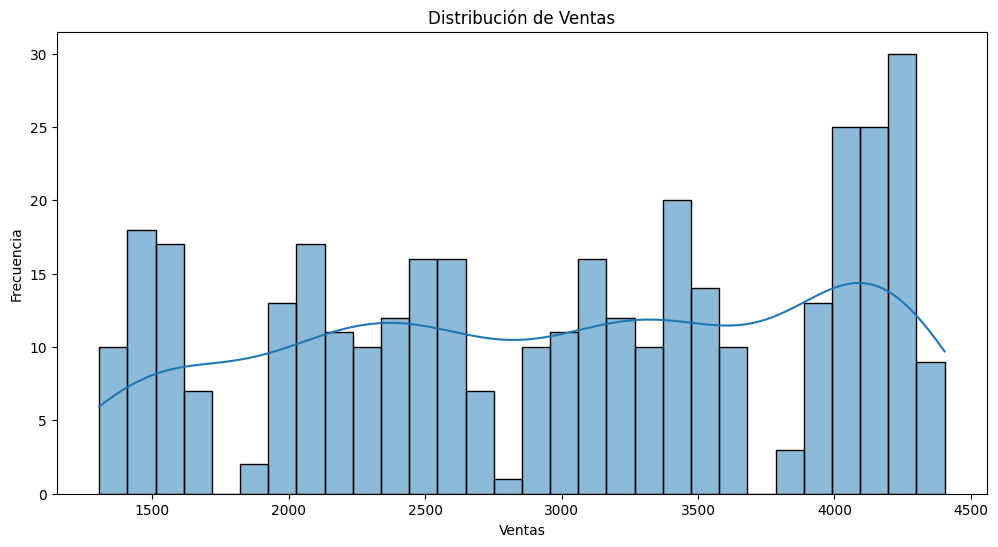

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df["Ventas"], bins=30, kde=True)
plt.title("Distribución de Ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia");

Text(0, 0.5, 'Ventas promedio')

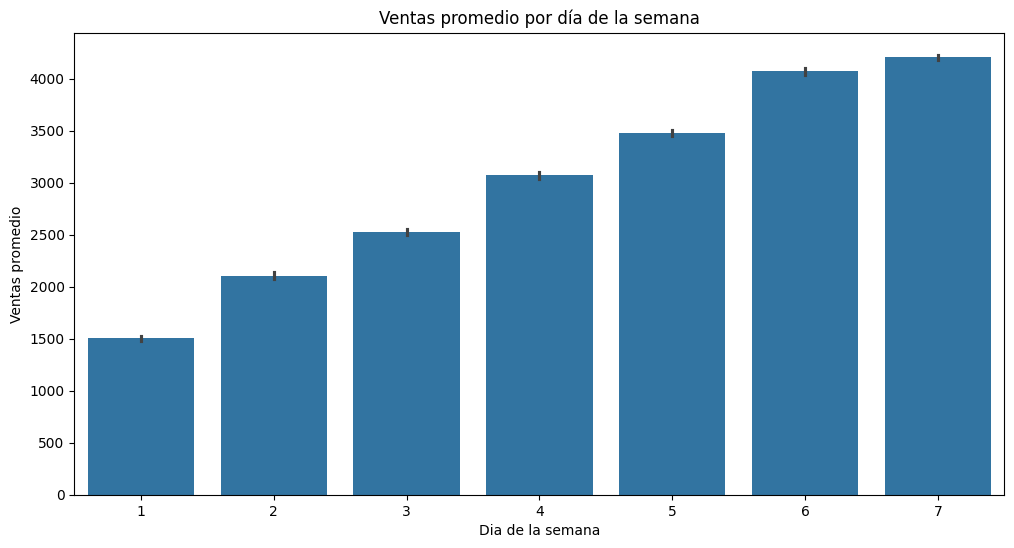

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="DiaDeLaSemana", y="Ventas")
plt.title("Ventas promedio por día de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Ventas promedio")



Text(0.5, 1.0, 'Interaccion entre promociones y dias festivos en las ventas')

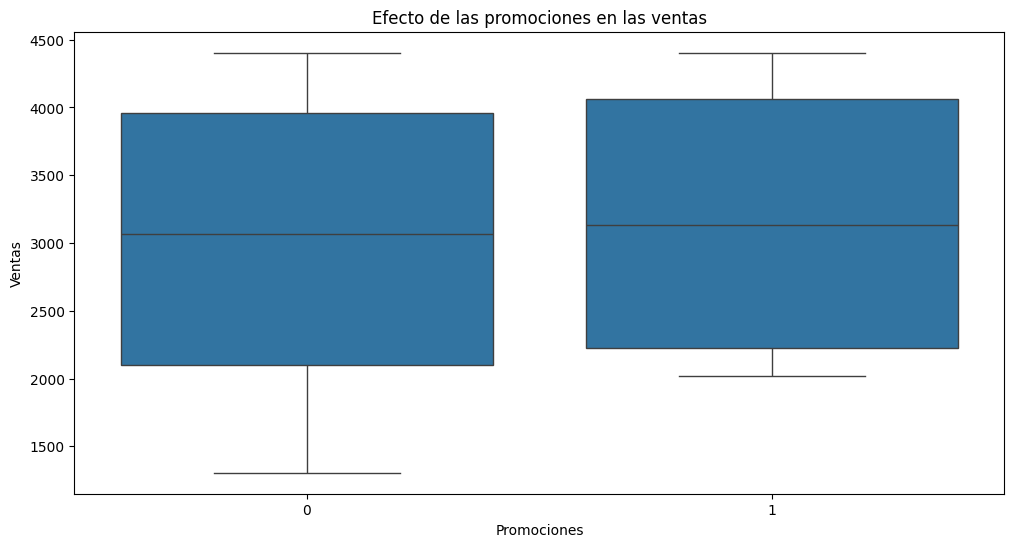

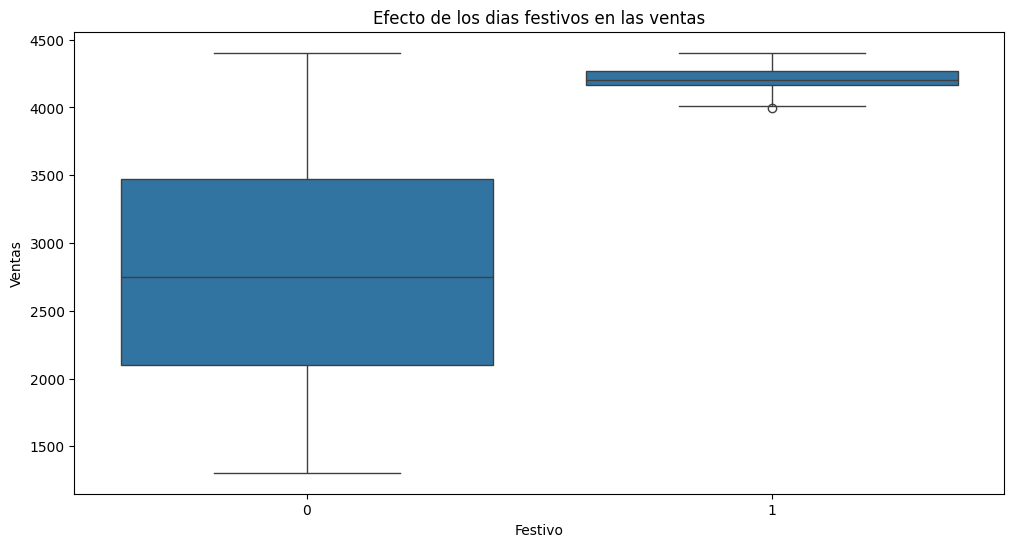

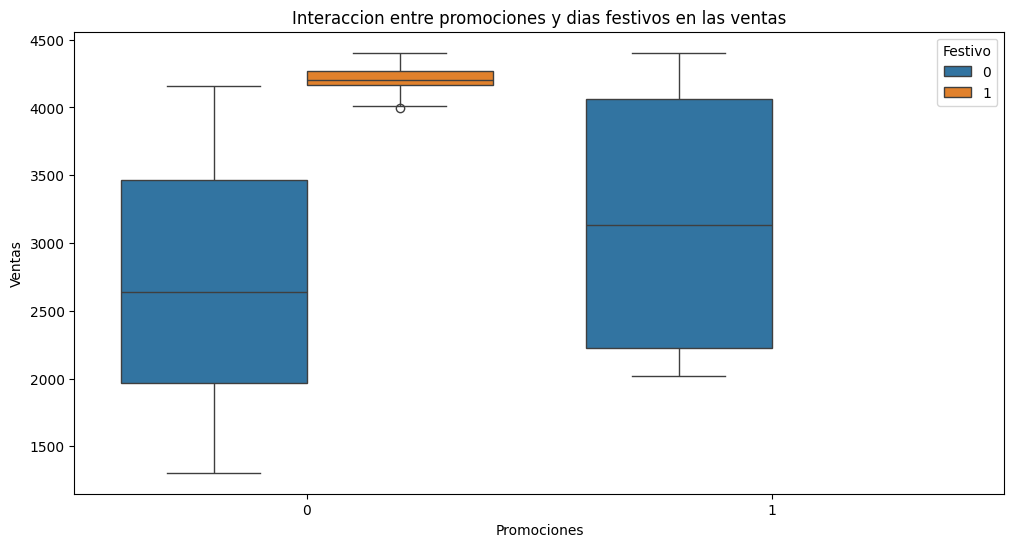

In [21]:
#boxplot para comparar las ventas con o sin promociones
plt.figure(figsize=(12,6))
sns.boxplot(x="Promociones", y="Ventas", data=df)
plt.title("Efecto de las promociones en las ventas")
"""
En los dias sin promociones la mediana en el lado izquiero del grafico es mas alta y una variabilidad mas grande basado 
en el rango intercuartilico. Al contrario los dias con promociones tienen una mediana mas alta y el rango intercuartilico
mas corto lo que da como resultado una menor variabilidad en las ventas ademas de hacerlas mas predecibles.
"""

#boxplot para comparar las ventas para los días normmales y festivos
plt.figure(figsize=(12,6))
sns.boxplot(x="Festivo", y="Ventas", data=df)
plt.title("Efecto de los dias festivos en las ventas")
"""
En los dias no festivos la variacion es muy grande. En los dias festivos la mediana de las ventas es mucho mas alta y la 
varianza es menor lo que indica que tiene un efecto positivo en las ventas
"""

#boxplot para ver la interracion  entre promociones y dias festivos en las ventas
plt.figure(figsize=(12,6))
sns.boxplot(x="Promociones", y="Ventas", hue="Festivo", data=df)
plt.title("Interaccion entre promociones y dias festivos en las ventas")
"""
Nota: no hay promociones en dias festivos segun el grafico
Los dias dias que no hay promocion y no son festivo tienen una menor de ventas que en las otras convinaciones, en segundo 
lugar de ventas se encuentra los dias no festivos y con promociones y en primer lugar los dias festivos y sin promociones 
con la mayor cantidad de ventas.
"""

In [27]:
# Almacenar los modelos
modelos=[
    ("modelo lineal", LinearRegression()),
    ("modelo arbol", DecisionTreeRegressor(random_state=42)),
    ("modelo bosque", RandomForestRegressor(random_state=42))
]

In [28]:
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje}')

modelo lineal: 0.9924245101323563
modelo arbol: 0.9923508015371342
modelo bosque: 0.9923097376813321


In [29]:
# Se guarda el modelo lineal en una variable
modelo_lineal = LinearRegression()

# Se entrena el modelo con los datos de entrenamiento
modelo_lineal.fit(X_entrena, y_entrena)

# Se realizan las predicciones usando el conjuntode prueba
predicciones_lineal = modelo_lineal.predict(X_prueba)


Text(0.5, 1.0, 'Ventas reales vs Ventas predichas')

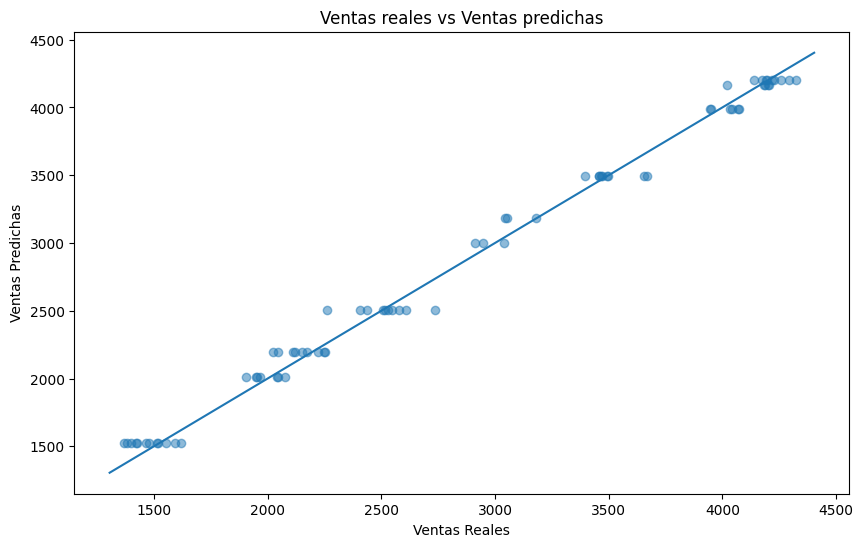

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(y_prueba, predicciones_lineal, alpha=0.5)
plt.plot([y.min(), y.max()],[y.min(), y.max()])
plt.xlabel("Ventas Reales")
plt.ylabel("Ventas Predichas")
plt.title("Ventas reales vs Ventas predichas")

In [31]:
df_test = pd.DataFrame({"Real":y_prueba, "Predicho": predicciones_lineal})
df_test = df_test.sort_index()

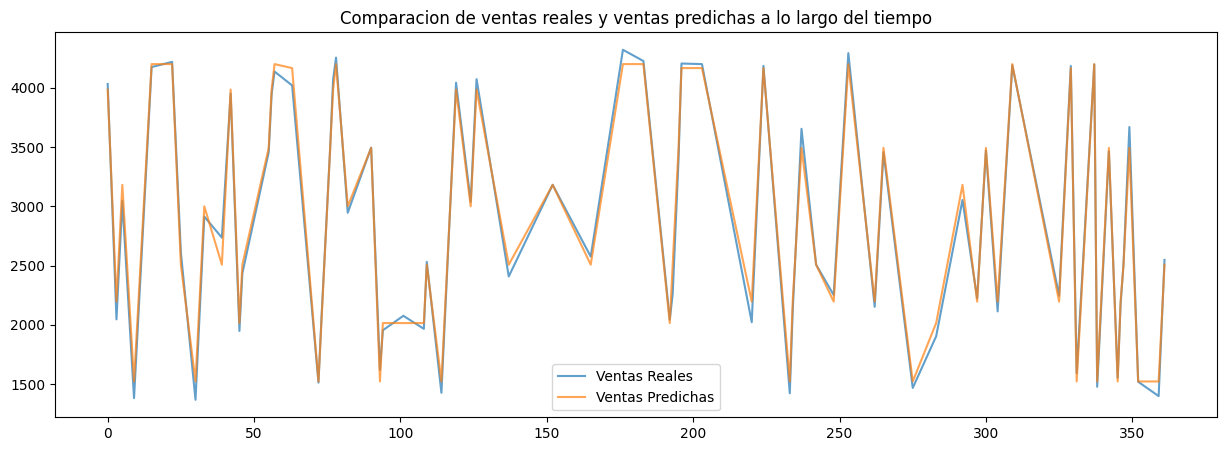

In [33]:
plt.figure(figsize=(15,5))
plt.plot(df_test["Real"], label="Ventas Reales", alpha=0.7)
plt.plot(df_test["Predicho"], label="Ventas Predichas", alpha=0.7)
plt.legend()
plt.title("Comparacion de ventas reales y ventas predichas a lo largo del tiempo");